# Desafios da Aula 01

In [1]:
# Importando as bilbiotecas
import pandas as pd

# Baixando o dataset "movies.csv" e armazenado em uma DataFrame
filmes = pd.read_csv('datasets/ml-latest-small/movies.csv')

# Trocando os nomes das colunas
filmes.columns = ['filmeId', 'titulo', 'generos']

# Visualizando o DataFrame
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
# Baixando o dataset "ratings.csv" e armazenado em uma DataFrame
avaliacoes = pd.read_csv('datasets/ml-latest-small/ratings.csv')

# Trocando os nomes das colunas
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

# Visualizando o DataFrame
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Desafio 1
Determine quantos filmes não obtiveram nota. Moetre quais são esses filmes.

In [3]:
# Calculando as médias das notas por filme
notas_medias_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()

# Juntando os DataFrames "filmes_com_medias" e "filmes"
medias_filmes = filmes.join(notas_medias_por_filme, on='filmeId')

# Separando os filmes sem nota
filmes_sem_notas = medias_filmes[medias_filmes['nota'].isna()]

# Calculando o total de filmes sem notas
total = filmes_sem_notas['titulo'].count()

# Mostrando o total de filmes sem notas e o títulos de todos eles
print(f'Total de filmes sem notas: {total}\n')
print('Lista de filmes sem notas')
for titulo in filmes_sem_notas['titulo']:
    print(f'==> {titulo}')

Total de filmes sem notas: 18

Lista de filmes sem notas
==> Innocents, The (1961)
==> Niagara (1953)
==> For All Mankind (1989)
==> Color of Paradise, The (Rang-e khoda) (1999)
==> I Know Where I'm Going! (1945)
==> Chosen, The (1981)
==> Road Home, The (Wo de fu qin mu qin) (1999)
==> Scrooge (1970)
==> Proof (1991)
==> Parallax View, The (1974)
==> This Gun for Hire (1942)
==> Roaring Twenties, The (1939)
==> Mutiny on the Bounty (1962)
==> In the Realms of the Unreal (2004)
==> Twentieth Century (1934)
==> Call Northside 777 (1948)
==> Browning Version, The (1951)
==> Chalet Girl (2011)


# Desafio 2
Junte os DataFrames **filmes** e **filmes_com_medias** e renomeie a columna ***nota*** para ***nota_media***

In [4]:
# Renomeando a coluna "nota" para "nota_media"
medias_filmes = medias_filmes.rename(columns={'nota': 'nota_media'})

# Mostrando o DataFrame atualizado
medias_filmes.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# Desafio 3
Colocar o número de avaliações por filme, isto é, não só a média, mas também o TOTAL de votos por filme

In [5]:
# Calculando o total de votos por filme
total_votos_por_filme = avaliacoes.groupby('filmeId')['nota'].count()

# Juntando os DataFrames "filmes_com_medias" e "total_votos_por_filme"
medias_filmes = medias_filmes.join(total_votos_por_filme, on='filmeId')

# Renomeando a coluna "nota" para "total_votos"
medias_filmes = medias_filmes.rename(columns={'nota': 'total_votos'})

# Mostrando o DataFrame atualizado
medias_filmes.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


# Desafio 4
Arredonde as médias da coluna "nota_media" para duas casas decimais

In [6]:
# Arredondando para duas casas decimais as médias da coluna "nota_media"
medias_filmes['nota_media'] = medias_filmes['nota_media'].round(2)

# Mostrando o DataFrame atualizado
medias_filmes.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


# Desafio extra
Qual filme teve a maior quantidade de votos?

In [7]:
# Criando uma "boolean mask"
selecao = medias_filmes['total_votos'] == medias_filmes['total_votos'].max()

# Encontrando o filme mais votado
mais_votado = medias_filmes[selecao]['titulo'].values[0]

# Mostrando o filme mais votado
print(f'O filme mais votado ==> {mais_votado}')

O filme mais votado ==> Forrest Gump (1994)


# Desafio 5 e 6
Descobrir quias são os gêneros dos filmes e quantos são os filmes de cada gênero.

In [8]:
# Calculando o total de filmes por de gêneros
generos = pd.Series(medias_filmes.generos.str.get_dummies().sum().sort_values(ascending=False))

# Mostrando a quantidade de filmes por gênero
generos

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

# Desafio 7
Plotar o gráfico de aparições por gênero. Pode ser um gráfico de tipo = barra

In [9]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

cmap = sns.diverging_palette(150, 275, l=55, s=80, n=9, center='dark', as_cmap=True)

# Tamanho da figura
plt.figure(figsize=(15, 8))

# Escolhendo o tipo de gráfico
generos.plot(kind='bar', colormap=cmap)

# Definindo o título
plt.title('Ocorrência de gêneros', fontsize=20)

# Definindo o eixo horizontal
plt.xlabel("Gêneros", fontsize=16)

# Definindo o eixo vertical
plt.ylabel("Ocorrência", fontsize=16)

# Rotacionando os gêneros em 45°
plt.xticks(rotation=45)

# Plotando a figura
plt.show()

<Figure size 1500x800 with 1 Axes>

### Ou usando o bilioteca seaborn

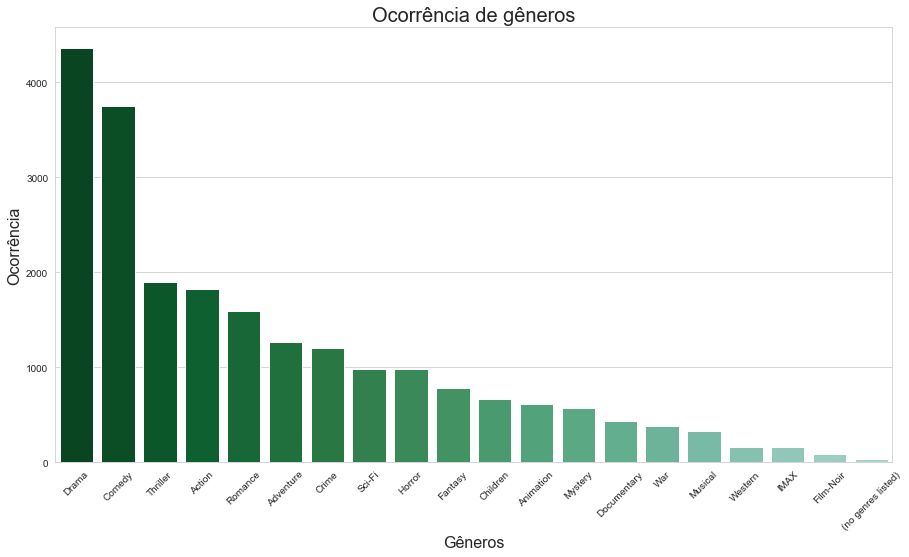

In [10]:
# Setando o estilo
sns.set_style('whitegrid')

# Tamanho da segunda figura
plt.figure(figsize=(15, 8))

# Plotando o gráfico de barra com a seaborn
sns.barplot(x=generos.index, y=generos.values, 
            palette=sns.color_palette('BuGn_r', n_colors=len(generos)+10))

# Definindo o título
plt.title('Ocorrência de gêneros', fontsize=20)

# Definindo o eixo horizontal
plt.xlabel("Gêneros", fontsize=16)

# Definindo o eixo vertical
plt.ylabel("Ocorrência", fontsize=16)

# Rotacionando os gêneros em 45°
plt.xticks(rotation=45)

plt.show()